# Case study on Unsupervised Learning

Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [45]:
df = pd.read_csv('/content/Wine.csv')

In [46]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [48]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

### K Means Clustering

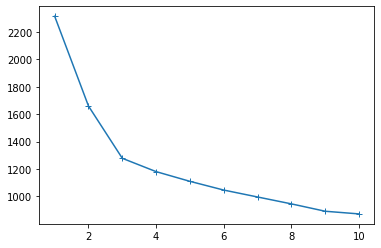

In [49]:
wcss = []
for i in range(1,11):
    model = KMeans(init='k-means++', n_clusters=i)
    model.fit(df_scaled)
    y_pred = model.fit_predict(df_scaled)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss,'+-')
    


In [50]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
model.fit(df_scaled)
y_kmeans = model.fit_predict(df_scaled)

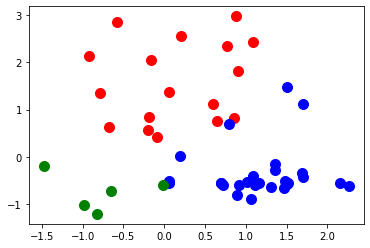

In [51]:
plt.scatter(df_scaled[y_kmeans == 0,0],df_scaled[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1,0],df_scaled[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2,0],df_scaled[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')



### Agglomerative Hierarchical Clustering

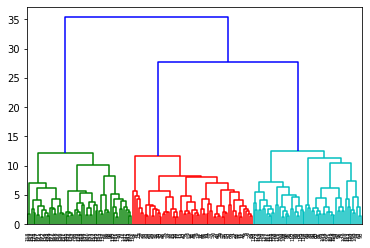

In [52]:
dendrogram= dendrogram(linkage(df_scaled,method ='ward'))

In [65]:
hc = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaled)

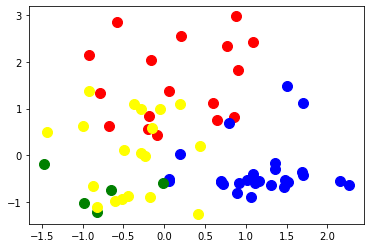

In [66]:
plt.scatter(df_scaled[y_kmeans == 0,0],df_scaled[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1,0],df_scaled[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2,0],df_scaled[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3,0],df_scaled[y_kmeans == 3,1],s=100,c='yellow',label='Cluster 4')